In [22]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import PIL.Image

In [23]:
def display_cv_image(image):
    clear_output(wait=True)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [24]:
def test_webcam_in_notebook():
    # Open the default camera (usually the first webcam)
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Unable to open the webcam.")
        return

    try:
        while True:
            # Capture frame-by-frame
            ret, frame = cap.read()

            #frame_resized = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)

            # Display the resulting frame
            display_cv_image(frame)

            # Check for KeyboardInterrupt to stop the loop
            #try:
            #    plt.pause(0.1)
            #except KeyboardInterrupt:
            #    break

    finally:
        # Release the camera
        cap.release()

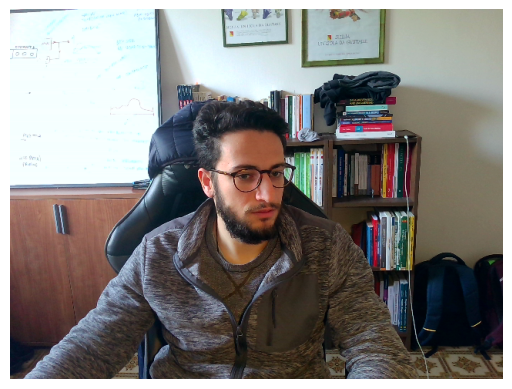

In [25]:
test_webcam_in_notebook()